<a href="https://colab.research.google.com/github/Sandesh02/sem-6/blob/main/dsbda5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('/content/drive/MyDrive/DSBDL final/Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])

In [10]:
x=df.iloc[:,1:4]
y=df.iloc[:,4:]

In [11]:
y.shape

(400, 1)

In [12]:
x.shape

(400, 3)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:

X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.30,random_state=42)

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [19]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=0, solver='lbfgs')
lr.fit(X_train,Y_train)
pred = lr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [25]:
lr.score(X_test,Y_test)

0.8416666666666667

In [37]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score, precision_score,recall_score,classification_report

In [31]:

matrix = confusion_matrix(Y_test,pred,labels=lr.classes_)
print(matrix)

[[71  2]
 [17 30]]


In [32]:
  tp,fn,fp,tn = confusion_matrix(Y_test,pred,labels=[1,0]).reshape(-1)

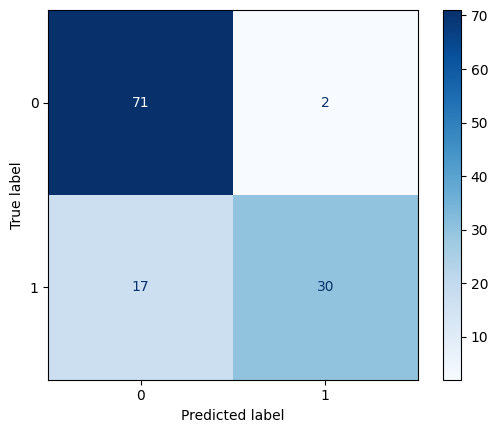

In [35]:

conf_matrix=ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=lr.classes_)
conf_matrix.plot(cmap=plt.cm.Blues)
plt.show()

In [38]:

print(classification_report(Y_test,pred))


              precision    recall  f1-score   support

           0       0.81      0.97      0.88        73
           1       0.94      0.64      0.76        47

    accuracy                           0.84       120
   macro avg       0.87      0.81      0.82       120
weighted avg       0.86      0.84      0.83       120



In [39]:
print('\nAccuracy: {:.2f}'.format(accuracy_score(Y_test,pred)))
print('Error Rate: ',(fp+fn)/(tp+tn+fn+fp))
print('Sensitivity (Recall or True positive rate) :',tp/(tp+fn))
print('Specificity (True negative rate) :',tn/(fp+tn))
print('Precision (Positive predictive value) :',tp/(tp+fp))
print('False Positive Rate :',fp/(tn+fp))
     


Accuracy: 0.84
Error Rate:  0.15833333333333333
Sensitivity (Recall or True positive rate) : 0.6382978723404256
Specificity (True negative rate) : 0.9726027397260274
Precision (Positive predictive value) : 0.9375
False Positive Rate : 0.0273972602739726
